In [4]:
#import datasets
import pandas as pd
import os
import pathlib

rootdir = pathlib.Path('.').resolve(strict=True)
datadir = rootdir.parents [1] / 'Prepared_Data'
print (datadir)

dataset = pd.read_csv(datadir / 'dataset_physicochemical_class_change.csv', delimiter=',')

/Users/edasamiloglu/ace2-rbd-point-mutation-benchmark/Prepared_Data


#case_id protein mutation_type predictor    ddg  succ_rate  \
0       A386C    ACE2            RD    EvoEF1 -0.040          0   
1       A386E    ACE2            RD    EvoEF1  0.050          1   
2       A386I    ACE2             E    EvoEF1 -0.010          1   
3       A386L    ACE2             E    EvoEF1 -0.120          1   
4       A386M    ACE2             E    EvoEF1 -0.120          1   
...       ...     ...           ...       ...    ...        ...   
1573     Y83E    ACE2            MD     SSIPe  1.829          1   
1574     Y83L    ACE2             E     SSIPe  0.507          0   
1575     Y83Q    ACE2            MD     SSIPe  2.142          1   
1576     Y83R    ACE2            RD     SSIPe  1.898          1   
1577     Y83V    ACE2             E     SSIPe  1.230          0   

      volume_changes  hydroph_changes  flexibility physichem_property  \
0            0.09205            -0.33            2          no_change   
1            0.27135            -1.36            8        charge_gain   
2            0.31969             0.76            8          no_change   
3            0.32174             0.44            8          no_change   
4            0.33170             0.02           26          no_change   
...              ...              ...          ...                ...   
1573        -0.28313            -1.00            6        charge_gain   
1574        -0.23274             0.80            6      polarity_loss   
1575        -0.26289            -1.11            6          no_change   
1576        -0.02204            -2.79           78        charge_gain   
1577        -0.35476             0.82            0      polarity_loss   

     succ_tag mutation_tag      subset_label  
0     failure     Depleted  Depleted_failure  
1     success     Depleted  Depleted_success  
2     success     Enriched  Enriched_success  
3     success     Enriched  Enriched_success  
4     success     Enriched  Enriched_success  
...       ...          ...               ...  
1573  success     Depleted  Depleted_success  
1574  failure     Enriched  Enriched_failure  
1575  success     Depleted  Depleted_success  
1576  success     Depleted  Depleted_success  
1577  failure     Enriched  Enriched_failure  

[1578 rows x 13 columns]

In [2]:
# EXPERIMENTAL

#a random predictor's dataset used instead of Experimental dataset

#charge_gain
Experimental = dataset[dataset['predictor'].str.contains("HADDOCK")]

charge_gain_experimental = Experimental[Experimental['physichem_property'].str.contains("charge_gain")]
Enr_charge_gain_experimental = charge_gain_experimental[charge_gain_experimental['mutation_type'].str.contains("E")]
Dep_charge_gain_experimental = charge_gain_experimental[charge_gain_experimental['mutation_type'].str.contains("MD") | charge_gain_experimental['mutation_type'].str.contains("RD")]


#charge_loss
charge_loss_experimental = Experimental[Experimental['physichem_property'].str.contains("charge_loss")]
Enr_charge_loss_experimental = charge_loss_experimental[charge_loss_experimental['mutation_type'].str.contains("E")]
Dep_charge_loss_experimental = charge_loss_experimental[charge_loss_experimental['mutation_type'].str.contains("MD") | charge_loss_experimental['mutation_type'].str.contains("RD")]

#no_change
no_change_experimental = Experimental[Experimental['physichem_property'].str.contains("no_change")]
Enr_no_change_experimental = no_change_experimental[no_change_experimental['mutation_type'].str.contains("E")]
Dep_no_change_experimental = no_change_experimental[no_change_experimental['mutation_type'].str.contains("MD") | no_change_experimental['mutation_type'].str.contains("RD")]

#polarity_gain
polarity_gain_experimental = Experimental[Experimental['physichem_property'].str.contains("polarity_gain")]
Enr_polarity_gain_experimental = polarity_gain_experimental[polarity_gain_experimental['mutation_type'].str.contains("E")]
Dep_polarity_gain_experimental = polarity_gain_experimental[polarity_gain_experimental['mutation_type'].str.contains("MD") | polarity_gain_experimental['mutation_type'].str.contains("RD")]

#polarity_loss
polarity_loss_experimental = Experimental[Experimental['physichem_property'].str.contains("polarity_loss")]
Enr_polarity_loss_experimental = polarity_loss_experimental[polarity_loss_experimental['mutation_type'].str.contains("E")]
Dep_polarity_loss_experimental = polarity_loss_experimental[polarity_loss_experimental['mutation_type'].str.contains("MD") | polarity_loss_experimental['mutation_type'].str.contains("RD")]


In [3]:
#get only success cases from the dataset file.
dataset_Succ = dataset[dataset['succ_tag'].str.contains("success")] 

#no_change

no_change = dataset_Succ[dataset_Succ['physichem_property'].str.contains("no_change")]
Enr_no_change = no_change[no_change['mutation_tag'].str.contains("Enriched")]
Dep_no_change = no_change[no_change['mutation_tag'].str.contains("Depleted")]

#get only HADDOCK related cases from success no_change subset
no_change_HADDOCK = no_change[no_change['predictor'].str.contains("HADDOCK")]
Enr_no_change_HADDOCK = no_change_HADDOCK[no_change_HADDOCK['mutation_tag'].str.contains("Enriched")]
Dep_no_change_HADDOCK = no_change_HADDOCK[no_change_HADDOCK['mutation_tag'].str.contains("Depleted")]

#get only FoldX related cases from success no_change subset
no_change_FoldX = no_change[no_change['predictor']=="FoldX"]
Enr_no_change_FoldX = no_change_FoldX[no_change_FoldX['mutation_tag'].str.contains("Enriched")]
Dep_no_change_FoldX = no_change_FoldX[no_change_FoldX['mutation_tag'].str.contains("Depleted")]

#get only FoldXwater related cases from success no_change subset
no_change_FoldXwater = no_change[no_change['predictor']=="FoldXwater"]
Enr_no_change_FoldXwater = no_change_FoldXwater[no_change_FoldXwater['mutation_tag'].str.contains("Enriched")]
Dep_no_change_FoldXwater = no_change_FoldXwater[no_change_FoldXwater['mutation_tag'].str.contains("Depleted")]

#get only EvoEF1 related cases from success no_change subset
no_change_EvoEF1 = no_change[no_change['predictor'].str.contains("EvoEF1")]
Enr_no_change_EvoEF1 = no_change_EvoEF1[no_change_EvoEF1['mutation_tag'].str.contains("Enriched")]
Dep_no_change_EvoEF1 = no_change_EvoEF1[no_change_EvoEF1['mutation_tag'].str.contains("Depleted")]

#get only MutaBind2 related cases from success no_change subset
no_change_MutaBind2 = no_change[no_change['predictor'].str.contains("MutaBind2")]
Enr_no_change_MutaBind2 = no_change_MutaBind2[no_change_MutaBind2['mutation_tag'].str.contains("Enriched")]
Dep_no_change_MutaBind2 = no_change_MutaBind2[no_change_MutaBind2['mutation_tag'].str.contains("Depleted")]

#get only SSIPe related cases from success no_change subset
no_change_SSIPe = no_change[no_change['predictor'].str.contains("SSIPe")]
Enr_no_change_SSIPe = no_change_SSIPe[no_change_SSIPe['mutation_tag'].str.contains("Enriched")]
Dep_no_change_SSIPe = no_change_SSIPe[no_change_SSIPe['mutation_tag'].str.contains("Depleted")]

#charge_gain

charge_gain = dataset_Succ[dataset_Succ['physichem_property'].str.contains("charge_gain")]
Enr_charge_gain = charge_gain[charge_gain['mutation_tag'].str.contains("Enriched")]
Dep_charge_gain = charge_gain[charge_gain['mutation_tag'].str.contains("Depleted")]

charge_gain_HADDOCK = charge_gain[charge_gain['predictor'].str.contains("HADDOCK")]
Enr_charge_gain_HADDOCK = charge_gain_HADDOCK[charge_gain_HADDOCK['mutation_tag'].str.contains("Enriched")]
Dep_charge_gain_HADDOCK = charge_gain_HADDOCK[charge_gain_HADDOCK['mutation_tag'].str.contains("Depleted")]

charge_gain_FoldX = charge_gain[charge_gain['predictor']=="FoldX"]
Enr_charge_gain_FoldX = charge_gain_FoldX[charge_gain_FoldX['mutation_tag'].str.contains("Enriched")]
Dep_charge_gain_FoldX = charge_gain_FoldX[charge_gain_FoldX['mutation_tag'].str.contains("Depleted")]

charge_gain_FoldXwater = charge_gain[charge_gain['predictor']=="FoldXwater"]
Enr_charge_gain_FoldXwater = charge_gain_FoldXwater[charge_gain_FoldXwater['mutation_tag'].str.contains("Enriched")]
Dep_charge_gain_FoldXwater = charge_gain_FoldXwater[charge_gain_FoldXwater['mutation_tag'].str.contains("Depleted")]

charge_gain_EvoEF1 = charge_gain[charge_gain['predictor'].str.contains("EvoEF1")]
Enr_charge_gain_EvoEF1 = charge_gain_EvoEF1[charge_gain_EvoEF1['mutation_tag'].str.contains("Enriched")]
Dep_charge_gain_EvoEF1 = charge_gain_EvoEF1[charge_gain_EvoEF1['mutation_tag'].str.contains("Depleted")]

charge_gain_MutaBind2 = charge_gain[charge_gain['predictor'].str.contains("MutaBind2")]
Enr_charge_gain_MutaBind2 = charge_gain_MutaBind2[charge_gain_MutaBind2['mutation_tag'].str.contains("Enriched")]
Dep_charge_gain_MutaBind2 = charge_gain_MutaBind2[charge_gain_MutaBind2['mutation_tag'].str.contains("Depleted")]

charge_gain_SSIPe = charge_gain[charge_gain['predictor'].str.contains("SSIPe")]
Enr_charge_gain_SSIPe = charge_gain_SSIPe[charge_gain_SSIPe['mutation_tag'].str.contains("Enriched")]
Dep_charge_gain_SSIPe = charge_gain_SSIPe[charge_gain_SSIPe['mutation_tag'].str.contains("Depleted")]

#charge_loss

charge_loss = dataset_Succ[dataset_Succ['physichem_property'].str.contains("charge_loss")]
Enr_charge_loss = charge_loss[charge_loss['mutation_tag'].str.contains("Enriched")]
Dep_charge_loss = charge_loss[charge_loss['mutation_tag'].str.contains("Depleted")]

charge_loss_HADDOCK = charge_loss[charge_loss['predictor'].str.contains("HADDOCK")]
Enr_charge_loss_HADDOCK = charge_loss_HADDOCK[charge_loss_HADDOCK['mutation_tag'].str.contains("Enriched")]
Dep_charge_loss_HADDOCK = charge_loss_HADDOCK[charge_loss_HADDOCK['mutation_tag'].str.contains("Depleted")]

charge_loss_FoldX = charge_loss[charge_loss['predictor']=="FoldX"]
Enr_charge_loss_FoldX = charge_loss_FoldX[charge_loss_FoldX['mutation_tag'].str.contains("Enriched")]
Dep_charge_loss_FoldX = charge_loss_FoldX[charge_loss_FoldX['mutation_tag'].str.contains("Depleted")]

charge_loss_FoldXwater = charge_loss[charge_loss['predictor']=="FoldXwater"]
Enr_charge_loss_FoldXwater = charge_loss_FoldXwater[charge_loss_FoldXwater['mutation_tag'].str.contains("Enriched")]
Dep_charge_loss_FoldXwater = charge_loss_FoldXwater[charge_loss_FoldXwater['mutation_tag'].str.contains("Depleted")]

charge_loss_EvoEF1 = charge_loss[charge_loss['predictor'].str.contains("EvoEF1")]
Enr_charge_loss_EvoEF1 = charge_loss_EvoEF1[charge_loss_EvoEF1['mutation_tag'].str.contains("Enriched")]
Dep_charge_loss_EvoEF1 = charge_loss_EvoEF1[charge_loss_EvoEF1['mutation_tag'].str.contains("Depleted")]

charge_loss_MutaBind2 = charge_loss[charge_loss['predictor'].str.contains("MutaBind2")]
Enr_charge_loss_MutaBind2 = charge_loss_MutaBind2[charge_loss_MutaBind2['mutation_tag'].str.contains("Enriched")]
Dep_charge_loss_MutaBind2 = charge_loss_MutaBind2[charge_loss_MutaBind2['mutation_tag'].str.contains("Depleted")]

charge_loss_SSIPe = charge_loss[charge_loss['predictor'].str.contains("SSIPe")]
Enr_charge_loss_SSIPe = charge_loss_SSIPe[charge_loss_SSIPe['mutation_tag'].str.contains("Enriched")]
Dep_charge_loss_SSIPe = charge_loss_SSIPe[charge_loss_SSIPe['mutation_tag'].str.contains("Depleted")]

#polarity_loss

polarity_loss = dataset_Succ[dataset_Succ['physichem_property'].str.contains("polarity_loss")]
Enr_polarity_loss = polarity_loss[polarity_loss['mutation_tag'].str.contains("Enriched")]
Dep_polarity_loss = polarity_loss[polarity_loss['mutation_tag'].str.contains("Depleted")]

polarity_loss_HADDOCK = polarity_loss[polarity_loss['predictor'].str.contains("HADDOCK")]
Enr_polarity_loss_HADDOCK = polarity_loss_HADDOCK[polarity_loss_HADDOCK['mutation_tag'].str.contains("Enriched")]
Dep_polarity_loss_HADDOCK = polarity_loss_HADDOCK[polarity_loss_HADDOCK['mutation_tag'].str.contains("Depleted")]

polarity_loss_FoldX = polarity_loss[polarity_loss['predictor']=="FoldX"]
Enr_polarity_loss_FoldX = polarity_loss_FoldX[polarity_loss_FoldX['mutation_tag'].str.contains("Enriched")]
Dep_polarity_loss_FoldX = polarity_loss_FoldX[polarity_loss_FoldX['mutation_tag'].str.contains("Depleted")]

polarity_loss_FoldXwater = polarity_loss[polarity_loss['predictor']=="FoldXwater"]
Enr_polarity_loss_FoldXwater = polarity_loss_FoldXwater[polarity_loss_FoldXwater['mutation_tag'].str.contains("Enriched")]
Dep_polarity_loss_FoldXwater = polarity_loss_FoldXwater[polarity_loss_FoldXwater['mutation_tag'].str.contains("Depleted")]

polarity_loss_EvoEF1 = polarity_loss[polarity_loss['predictor'].str.contains("EvoEF1")]
Enr_polarity_loss_EvoEF1 = polarity_loss_EvoEF1[polarity_loss_EvoEF1['mutation_tag'].str.contains("Enriched")]
Dep_polarity_loss_EvoEF1 = polarity_loss_EvoEF1[polarity_loss_EvoEF1['mutation_tag'].str.contains("Depleted")]

polarity_loss_MutaBind2 = polarity_loss[polarity_loss['predictor'].str.contains("MutaBind2")]
Enr_polarity_loss_MutaBind2 = polarity_loss_MutaBind2[polarity_loss_MutaBind2['mutation_tag'].str.contains("Enriched")]
Dep_polarity_loss_MutaBind2 = polarity_loss_MutaBind2[polarity_loss_MutaBind2['mutation_tag'].str.contains("Depleted")]

polarity_loss_SSIPe = polarity_loss[polarity_loss['predictor'].str.contains("SSIPe")]
Enr_polarity_loss_SSIPe = polarity_loss_SSIPe[polarity_loss_SSIPe['mutation_tag'].str.contains("Enriched")]
Dep_polarity_loss_SSIPe = polarity_loss_SSIPe[polarity_loss_SSIPe['mutation_tag'].str.contains("Depleted")]

#polarity_gain

polarity_gain = dataset_Succ[dataset_Succ['physichem_property'].str.contains("polarity_gain")]
Enr_polarity_gain = polarity_gain[polarity_gain['mutation_tag'].str.contains("Enriched")]
Dep_polarity_gain = polarity_gain[polarity_gain['mutation_tag'].str.contains("Depleted")]

polarity_gain_HADDOCK = polarity_gain[polarity_gain['predictor'].str.contains("HADDOCK")]
Enr_polarity_gain_HADDOCK = polarity_gain_HADDOCK[polarity_gain_HADDOCK['mutation_tag'].str.contains("Enriched")]
Dep_polarity_gain_HADDOCK = polarity_gain_HADDOCK[polarity_gain_HADDOCK['mutation_tag'].str.contains("Depleted")]

polarity_gain_FoldX = polarity_gain[polarity_gain['predictor']=="FoldX"]
Enr_polarity_gain_FoldX = polarity_gain_FoldX[polarity_gain_FoldX['mutation_tag'].str.contains("Enriched")]
Dep_polarity_gain_FoldX = polarity_gain_FoldX[polarity_gain_FoldX['mutation_tag'].str.contains("Depleted")]

polarity_gain_FoldXwater = polarity_gain[polarity_gain['predictor']=="FoldXwater"]
Enr_polarity_gain_FoldXwater = polarity_gain_FoldXwater[polarity_gain_FoldXwater['mutation_tag'].str.contains("Enriched")]
Dep_polarity_gain_FoldXwater = polarity_gain_FoldXwater[polarity_gain_FoldXwater['mutation_tag'].str.contains("Depleted")]

polarity_gain_EvoEF1 = polarity_gain[polarity_gain['predictor'].str.contains("EvoEF1")]
Enr_polarity_gain_EvoEF1 = polarity_gain_EvoEF1[polarity_gain_EvoEF1['mutation_tag'].str.contains("Enriched")]
Dep_polarity_gain_EvoEF1 = polarity_gain_EvoEF1[polarity_gain_EvoEF1['mutation_tag'].str.contains("Depleted")]

polarity_gain_MutaBind2 = polarity_gain[polarity_gain['predictor'].str.contains("MutaBind2")]
Enr_polarity_gain_MutaBind2 = polarity_gain_MutaBind2[polarity_gain_MutaBind2['mutation_tag'].str.contains("Enriched")]
Dep_polarity_gain_MutaBind2 = polarity_gain_MutaBind2[polarity_gain_MutaBind2['mutation_tag'].str.contains("Depleted")]

polarity_gain_SSIPe = polarity_gain[polarity_gain['predictor'].str.contains("SSIPe")]
Enr_polarity_gain_SSIPe = polarity_gain_SSIPe[polarity_gain_SSIPe['mutation_tag'].str.contains("Enriched")]
Dep_polarity_gain_SSIPe = polarity_gain_SSIPe[polarity_gain_SSIPe['mutation_tag'].str.contains("Depleted")]



In [4]:
#function for get dataframe names
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [5]:
# Enriched Charge_gain
list = [Enr_charge_gain_experimental,Enr_charge_gain_HADDOCK, Enr_charge_gain_FoldX, Enr_charge_gain_FoldXwater, Enr_charge_gain_EvoEF1, Enr_charge_gain_MutaBind2, Enr_charge_gain_SSIPe]

Enr_charge_gain_total_counts = []
for i in list:
        count = get_df_name(i), i.groupby(["physichem_property"]).size().reset_index(name="count")
        Enr_charge_gain_total_counts.append(count)
        
total = Enr_charge_gain_total_counts[0][1]
HADDOCK = Enr_charge_gain_total_counts[1][1]
FoldX = Enr_charge_gain_total_counts[2][1]
FoldXwater = Enr_charge_gain_total_counts[3][1]
EvoEF1 = Enr_charge_gain_total_counts[4][1]
MutaBind2 = Enr_charge_gain_total_counts[5][1]
SSIPe = Enr_charge_gain_total_counts[6][1]

counts = total.append([HADDOCK, FoldX, FoldXwater, EvoEF1, MutaBind2, SSIPe], ignore_index=True)

d = {'predictor': ["Enriched", "HADDOCK", "FoldX", "FoldXwater", "EvoEF1", "MutaBind2", "SSIPe"]}
predictor_names = pd.DataFrame(data=d)

Enr_charge_gain_data = pd.DataFrame(data=pd.concat([predictor_names,counts],axis=1)).reset_index(drop=True)
Enr_charge_gain_data['count']=Enr_charge_gain_data['count'].div(len(Experimental))


#Depleted Charge_gain
list = [Dep_charge_gain_experimental,Dep_charge_gain_HADDOCK, Dep_charge_gain_FoldX, Dep_charge_gain_FoldXwater, Dep_charge_gain_EvoEF1, Dep_charge_gain_MutaBind2, Dep_charge_gain_SSIPe]

Dep_charge_gain_total_counts = []
for i in list:
        count = get_df_name(i), i.groupby(["physichem_property"]).size().reset_index(name="count")
        Dep_charge_gain_total_counts.append(count)
        
total = Dep_charge_gain_total_counts[0][1]
HADDOCK = Dep_charge_gain_total_counts[1][1]
FoldX = Dep_charge_gain_total_counts[2][1]
FoldXwater = Dep_charge_gain_total_counts[3][1]
EvoEF1 = Dep_charge_gain_total_counts[4][1]
MutaBind2 = Dep_charge_gain_total_counts[5][1]
SSIPe = Dep_charge_gain_total_counts[6][1]

counts = total.append([HADDOCK, FoldX, FoldXwater, EvoEF1, MutaBind2, SSIPe], ignore_index=True)

d = {'predictor': ["Depleted", "HADDOCK", "FoldX", " FoldXwater", "EvoEF1", "MutaBind2", "SSIPe"]}
predictor_names = pd.DataFrame(data=d)

Dep_charge_gain_data = pd.DataFrame(data=pd.concat([predictor_names,counts],axis=1)).reset_index(drop=True)
Dep_charge_gain_data['count']=Dep_charge_gain_data['count'].div(len(Experimental))

# Enriched Polarity_gain
list = [Enr_polarity_gain_experimental,Enr_polarity_gain_HADDOCK, Enr_polarity_gain_FoldX, Enr_polarity_gain_FoldXwater, Enr_polarity_gain_EvoEF1, Enr_polarity_gain_MutaBind2, Enr_polarity_gain_SSIPe]

Enr_polarity_gain_total_counts = []
for i in list:
        count = get_df_name(i), i.groupby(["physichem_property"]).size().reset_index(name="count")
        Enr_polarity_gain_total_counts.append(count)

total = Enr_polarity_gain_total_counts[0][1]
HADDOCK = Enr_polarity_gain_total_counts[1][1]
FoldX = Enr_polarity_gain_total_counts[2][1]
FoldXwater = Enr_polarity_gain_total_counts[3][1]
EvoEF1 = Enr_polarity_gain_total_counts[4][1]
MutaBind2 = Enr_polarity_gain_total_counts[5][1]
SSIPe = Enr_polarity_gain_total_counts[6][1]

counts = total.append([HADDOCK, FoldX, FoldXwater, EvoEF1, MutaBind2, SSIPe], ignore_index=True)

d = {'predictor': ["Enriched", "HADDOCK", "FoldX", "FoldXwater", "EvoEF1", "MutaBind2", "SSIPe"]}
predictor_names = pd.DataFrame(data=d)

Enr_polarity_gain_data = pd.DataFrame(data=pd.concat([predictor_names,counts],axis=1)).reset_index(drop=True)
Enr_polarity_gain_data['count']=Enr_polarity_gain_data['count'].div(len(Experimental))


#Depleted Polarity_gain
list = [Dep_polarity_gain_experimental,Dep_polarity_gain_HADDOCK, Dep_polarity_gain_FoldX, Dep_polarity_gain_FoldXwater, Dep_polarity_gain_EvoEF1, Dep_polarity_gain_MutaBind2, Dep_polarity_gain_SSIPe]

Dep_polarity_gain_total_counts = []
for i in list:
        count = get_df_name(i), i.groupby(["physichem_property"]).size().reset_index(name="count")
        Dep_polarity_gain_total_counts.append(count)

total = Dep_polarity_gain_total_counts[0][1]
HADDOCK = Dep_polarity_gain_total_counts[1][1]
FoldX = Dep_polarity_gain_total_counts[2][1]
FoldXwater = Dep_polarity_gain_total_counts[3][1]
EvoEF1 = Dep_polarity_gain_total_counts[4][1]
MutaBind2 = Dep_polarity_gain_total_counts[5][1]
SSIPe = Dep_polarity_gain_total_counts[6][1]

counts = total.append([HADDOCK, FoldX, FoldXwater, EvoEF1, MutaBind2, SSIPe], ignore_index=True)

d = {'predictor': ["Depleted", "HADDOCK", "FoldX", " FoldXwater", "EvoEF1", "MutaBind2", "SSIPe"]}
predictor_names = pd.DataFrame(data=d)

Dep_polarity_gain_data = pd.DataFrame(data=pd.concat([predictor_names,counts],axis=1)).reset_index(drop=True)
Dep_polarity_gain_data['count']=Dep_polarity_gain_data['count'].div(len(Experimental))

# Enriched Charge_loss
list = [Enr_charge_loss_experimental,Enr_charge_loss_HADDOCK, Enr_charge_loss_FoldX, Enr_charge_loss_FoldXwater, Enr_charge_loss_EvoEF1, Enr_charge_loss_MutaBind2, Enr_charge_loss_SSIPe]

Enr_charge_loss_total_counts = []
for i in list:
        count = get_df_name(i), i.groupby(["physichem_property"]).size().reset_index(name="count")
        Enr_charge_loss_total_counts.append(count)

        
total = Enr_charge_loss_total_counts[0][1]
HADDOCK = Enr_charge_loss_total_counts[1][1]
FoldX = Enr_charge_loss_total_counts[2][1]
FoldXwater = Enr_charge_loss_total_counts[3][1]
EvoEF1 = Enr_charge_loss_total_counts[4][1]
#Empty DataFrame created
MutaBind2 = {'physichem_property': ['charge_loss'], 'count': [0]}
MutaBind2 = pd.DataFrame(data=MutaBind2)

SSIPe = Enr_charge_loss_total_counts[6][1]

counts = total.append([HADDOCK, FoldX, FoldXwater, EvoEF1, MutaBind2, SSIPe], ignore_index=True)

d = {'predictor': ["Enriched", "HADDOCK", "FoldX", " FoldXwater", "EvoEF1", "MutaBind2", "SSIPe"]}
predictor_names = pd.DataFrame(data=d)

Enr_charge_loss_data = pd.DataFrame(data=pd.concat([predictor_names,counts],axis=1)).reset_index(drop=True)
Enr_charge_loss_data['count']=Enr_charge_loss_data['count'].div(len(Experimental))


#Depleted Charge_loss
list = [Dep_charge_loss_experimental,Dep_charge_loss_HADDOCK, Dep_charge_loss_FoldX, Dep_charge_loss_FoldXwater, Dep_charge_loss_EvoEF1, Dep_charge_loss_MutaBind2, Dep_charge_loss_SSIPe]

Dep_charge_loss_total_counts = []
for i in list:
        count = get_df_name(i), i.groupby(["physichem_property"]).size().reset_index(name="count")
        Dep_charge_loss_total_counts.append(count)

total = Dep_charge_loss_total_counts[0][1]
HADDOCK = Dep_charge_loss_total_counts[1][1]
FoldX = Dep_charge_loss_total_counts[2][1]
FoldXwater = Dep_charge_loss_total_counts[3][1]
EvoEF1 = Dep_charge_loss_total_counts[4][1]
MutaBind2 = Dep_charge_loss_total_counts[5][1]
SSIPe = Dep_charge_loss_total_counts[6][1]

counts = total.append([HADDOCK, FoldX, FoldXwater, EvoEF1, MutaBind2, SSIPe], ignore_index=True)

d = {'predictor': ["Depleted", "HADDOCK", "FoldX", " FoldXwater", "EvoEF1", "MutaBind2", "SSIPe"]}
predictor_names = pd.DataFrame(data=d)

Dep_charge_loss_data = pd.DataFrame(data=pd.concat([predictor_names,counts],axis=1)).reset_index(drop=True)
Dep_charge_loss_data['count']=Dep_charge_loss_data['count'].div(len(Experimental))

# Enriched Polarity_loss
list = [Enr_polarity_loss_experimental,Enr_polarity_loss_HADDOCK, Enr_polarity_loss_FoldX, Enr_polarity_loss_FoldXwater, Enr_polarity_loss_EvoEF1, Enr_polarity_loss_MutaBind2, Enr_polarity_loss_SSIPe]

Enr_polarity_loss_total_counts = []
for i in list:
        count = get_df_name(i), i.groupby(["physichem_property"]).size().reset_index(name="count")
        Enr_polarity_loss_total_counts.append(count)

total = Enr_polarity_loss_total_counts[0][1]
HADDOCK = Enr_polarity_loss_total_counts[1][1]
FoldX = Enr_polarity_loss_total_counts[2][1]
FoldXwater = Enr_polarity_loss_total_counts[3][1]
EvoEF1 = Enr_polarity_loss_total_counts[4][1]
MutaBind2 = Enr_polarity_loss_total_counts[5][1]
SSIPe = Enr_polarity_loss_total_counts[6][1]

counts = total.append([HADDOCK, FoldX, FoldXwater, EvoEF1, MutaBind2, SSIPe], ignore_index=True)

d = {'predictor': ["Enriched", "HADDOCK", "FoldX", "FoldXwater", "EvoEF1", "MutaBind2", "SSIPe"]}
predictor_names = pd.DataFrame(data=d)

Enr_polarity_loss_data = pd.DataFrame(data=pd.concat([predictor_names,counts],axis=1)).reset_index(drop=True)
Enr_polarity_loss_data['count']=Enr_polarity_loss_data['count'].div(len(Experimental))


#Depleted Polarity_loss
list = [Dep_polarity_loss_experimental,Dep_polarity_loss_HADDOCK, Dep_polarity_loss_FoldX, Dep_polarity_loss_FoldXwater, Dep_polarity_loss_EvoEF1, Dep_polarity_loss_MutaBind2, Dep_polarity_loss_SSIPe]

Dep_polarity_loss_total_counts = []
for i in list:
        count = get_df_name(i), i.groupby(["physichem_property"]).size().reset_index(name="count")
        Dep_polarity_loss_total_counts.append(count)

total = Dep_polarity_loss_total_counts[0][1]
HADDOCK = Dep_polarity_loss_total_counts[1][1]
FoldX = Dep_polarity_loss_total_counts[2][1]
FoldXwater = Dep_polarity_loss_total_counts[3][1]
EvoEF1 = Dep_polarity_loss_total_counts[4][1]
MutaBind2 = Dep_polarity_loss_total_counts[5][1]
SSIPe = Dep_polarity_loss_total_counts[6][1]

counts = total.append([HADDOCK, FoldX, FoldXwater, EvoEF1, MutaBind2, SSIPe], ignore_index=True)

d = {'predictor': ["Depleted", "HADDOCK", "FoldX", " FoldXwater", "EvoEF1", "MutaBind2", "SSIPe"]}
predictor_names = pd.DataFrame(data=d)

Dep_polarity_loss_data = pd.DataFrame(data=pd.concat([predictor_names,counts],axis=1)).reset_index(drop=True)
Dep_polarity_loss_data['count']=Dep_polarity_loss_data['count'].div(len(Experimental))
# Enriched no change
list = [Enr_no_change_experimental,Enr_no_change_HADDOCK, Enr_no_change_FoldX, Enr_no_change_FoldXwater, Enr_no_change_EvoEF1, Enr_no_change_MutaBind2, Enr_no_change_SSIPe]

Enr_no_change_total_counts = []
for i in list:
        count = get_df_name(i), i.groupby(["physichem_property"]).size().reset_index(name="count")
        Enr_no_change_total_counts.append(count)

total = Enr_no_change_total_counts[0][1]
HADDOCK = Enr_no_change_total_counts[1][1]
FoldX = Enr_no_change_total_counts[2][1]
FoldXwater = Enr_no_change_total_counts[3][1]
EvoEF1 = Enr_no_change_total_counts[4][1]
MutaBind2 = Enr_no_change_total_counts[5][1]
SSIPe = Enr_no_change_total_counts[6][1]

counts = total.append([HADDOCK, FoldX, FoldXwater, EvoEF1, MutaBind2, SSIPe], ignore_index=True)

d = {'predictor': ["Enriched", "HADDOCK", "FoldX", "FoldXwater", "EvoEF1", "MutaBind2", "SSIPe"]}
predictor_names = pd.DataFrame(data=d)

Enr_no_change_data = pd.DataFrame(data=pd.concat([predictor_names,counts],axis=1)).reset_index(drop=True)
Enr_no_change_data['count']=Enr_no_change_data['count'].div(len(Experimental))


#Depleted no change
list = [Dep_no_change_experimental,Dep_no_change_HADDOCK, Dep_no_change_FoldX, Dep_no_change_FoldXwater, Dep_no_change_EvoEF1, Dep_no_change_MutaBind2, Dep_no_change_SSIPe]

Dep_no_change_total_counts = []
for i in list:
        count = get_df_name(i), i.groupby(["physichem_property"]).size().reset_index(name="count")
        Dep_no_change_total_counts.append(count)

total = Dep_no_change_total_counts[0][1]
HADDOCK = Dep_no_change_total_counts[1][1]
FoldX = Dep_no_change_total_counts[2][1]
FoldXwater = Dep_no_change_total_counts[3][1]
EvoEF1 = Dep_no_change_total_counts[4][1]
MutaBind2 = Dep_no_change_total_counts[5][1]
SSIPe = Dep_no_change_total_counts[6][1]

counts = total.append([HADDOCK, FoldX, FoldXwater, EvoEF1, MutaBind2, SSIPe], ignore_index=True)

d = {'predictor': ["Depleted", "HADDOCK", "FoldX", " FoldXwater", "EvoEF1", "MutaBind2", "SSIPe"]}
predictor_names = pd.DataFrame(data=d)

Dep_no_change_data = pd.DataFrame(data=pd.concat([predictor_names,counts],axis=1)).reset_index(drop=True)
Dep_no_change_data['count']=Dep_no_change_data['count'].div(len(Experimental))

## Performance Table 

In [6]:
Enr_no_change = Enr_no_change_total_counts[0][1]["count"][0]
Enr_polarity_gain = Enr_polarity_gain_total_counts[0][1]["count"][0]
Enr_polarity_loss = Enr_polarity_loss_total_counts[0][1]["count"][0]
Enr_charge_gain = Enr_charge_gain_total_counts[0][1]["count"][0]
Enr_charge_loss = Enr_charge_loss_total_counts[0][1]["count"][0]

Dep_no_change = Dep_no_change_total_counts[0][1]["count"][0]
Dep_polarity_gain = Dep_polarity_gain_total_counts[0][1]["count"][0]
Dep_polarity_loss = Dep_polarity_loss_total_counts[0][1]["count"][0]
Dep_charge_gain = Dep_charge_gain_total_counts[0][1]["count"][0]
Dep_charge_loss = Dep_charge_loss_total_counts[0][1]["count"][0]

total_no_change = Enr_no_change + Dep_no_change
total_polarity_gain = Enr_polarity_gain + Dep_polarity_gain
total_polarity_loss = Enr_polarity_loss + Dep_polarity_loss
total_charge_gain = Enr_charge_gain + Dep_charge_gain
total_charge_loss = Enr_charge_loss + Dep_charge_loss


In [7]:
performance = open("Physicochemical_class_change_performances.txt","a") 

print(f'\n','Polarity gain', file=performance)
print(f'HADDOCK Enriched:', round(len(Enr_polarity_gain_HADDOCK) / total_polarity_gain *100, 2), file=performance)
print(f'HADDOCK Depleted:', round(len(Dep_polarity_gain_HADDOCK) / total_polarity_gain *100, 2), file=performance)
print(f'FoldX Enriched:', round(len(Enr_polarity_gain_FoldX) / total_polarity_gain *100, 2), file=performance)
print(f'FoldX Depleted:',round(len(Dep_polarity_gain_FoldX) / total_polarity_gain *100, 2), file=performance)
print(f'FoldXwater Enriched:',round(len(Enr_polarity_gain_FoldXwater) / total_polarity_gain *100, 2), file=performance)
print(f'FoldXwater Depleted:',round(len(Dep_polarity_gain_FoldXwater) / total_polarity_gain *100, 2), file=performance)
print(f'EvoEF1 Enriched:',round(len(Enr_polarity_gain_EvoEF1) / total_polarity_gain *100, 2), file=performance)
print(f'EvoEF1 Depleted:',round(len(Dep_polarity_gain_EvoEF1) / total_polarity_gain *100, 2), file=performance)
print(f'MutaBind2 Enriched:',round(len(Enr_polarity_gain_MutaBind2) / total_polarity_gain *100, 2), file=performance)
print(f'MutaBind2 Depleted:',round(len(Dep_polarity_gain_MutaBind2) / total_polarity_gain *100, 2), file=performance)
print(f'SSIPe Enriched:',round(len(Enr_polarity_gain_SSIPe) / total_polarity_gain *100, 2), file=performance)
print(f'SSIPe Depleted:',round(len(Dep_polarity_gain_SSIPe) / total_polarity_gain *100, 2), file=performance)

print(f'\n','Polarity loss', file=performance)
print(f'HADDOCK Enriched:', round(len(Enr_polarity_loss_HADDOCK) / total_polarity_loss *100, 2), file=performance)
print(f'HADDOCK Depleted:', round(len(Dep_polarity_loss_HADDOCK) / total_polarity_loss *100, 2), file=performance)
print(f'FoldX Enriched:', round(len(Enr_polarity_loss_FoldX) / total_polarity_loss *100, 2), file=performance)
print(f'FoldX Depleted:',round(len(Dep_polarity_loss_FoldX) / total_polarity_loss *100, 2), file=performance)
print(f'FoldXwater Enriched:',round(len(Enr_polarity_loss_FoldXwater) / total_polarity_loss *100, 2), file=performance)
print(f'FoldXwater Depleted:',round(len(Dep_polarity_loss_FoldXwater) / total_polarity_loss *100, 2), file=performance)
print(f'EvoEF1 Enriched:',round(len(Enr_polarity_loss_EvoEF1) / total_polarity_loss *100, 2), file=performance)
print(f'EvoEF1 Depleted:',round(len(Dep_polarity_loss_EvoEF1) / total_polarity_loss *100, 2), file=performance)
print(f'MutaBind2 Enriched:',round(len(Enr_polarity_loss_MutaBind2) / total_polarity_loss *100, 2), file=performance)
print(f'MutaBind2 Depleted:',round(len(Dep_polarity_loss_MutaBind2) / total_polarity_loss *100, 2), file=performance)
print(f'SSIPe Enriched:',round(len(Enr_polarity_loss_SSIPe) / total_polarity_loss *100, 2), file=performance)
print(f'SSIPe Depleted:',round(len(Dep_polarity_loss_SSIPe) / total_polarity_loss *100, 2), file=performance)

print(f'\n','Charge gain', file=performance)
print(f'HADDOCK Enriched:', round(len(Enr_charge_gain_HADDOCK) / total_charge_gain *100, 2), file=performance)
print(f'HADDOCK Depleted:', round(len(Dep_charge_gain_HADDOCK) / total_charge_gain *100, 2), file=performance)
print(f'FoldX Enriched:', round(len(Enr_charge_gain_FoldX) / total_charge_gain *100, 2), file=performance)
print(f'FoldX Depleted:',round(len(Dep_charge_gain_FoldX) / total_charge_gain *100, 2), file=performance)
print(f'FoldXwater Enriched:',round(len(Enr_charge_gain_FoldXwater) / total_charge_gain *100, 2), file=performance)
print(f'FoldXwater Depleted:',round(len(Dep_charge_gain_FoldXwater) / total_charge_gain *100, 2), file=performance)
print(f'EvoEF1 Enriched:',round(len(Enr_charge_gain_EvoEF1) / total_charge_gain *100, 2), file=performance)
print(f'EvoEF1 Depleted:',round(len(Dep_charge_gain_EvoEF1) / total_charge_gain *100, 2), file=performance)
print(f'MutaBind2 Enriched:',round(len(Enr_charge_gain_MutaBind2) / total_charge_gain *100, 2), file=performance)
print(f'MutaBind2 Depleted:',round(len(Dep_charge_gain_MutaBind2) / total_charge_gain *100, 2), file=performance)
print(f'SSIPe Enriched:',round(len(Enr_charge_gain_SSIPe) / total_charge_gain *100, 2), file=performance)
print(f'SSIPe Depleted:',round(len(Dep_charge_gain_SSIPe) / total_charge_gain *100, 2), file=performance)


print(f'\n','Charge loss', file=performance)
print(f'HADDOCK Enriched:', round(len(Enr_charge_loss_HADDOCK) / total_charge_loss *100, 2), file=performance)
print(f'HADDOCK Depleted:', round(len(Dep_charge_loss_HADDOCK) / total_charge_loss *100, 2), file=performance)
print(f'FoldX Enriched:', round(len(Enr_charge_loss_FoldX) / total_charge_loss *100, 2), file=performance)
print(f'FoldX Depleted:',round(len(Dep_charge_loss_FoldX) / total_charge_loss *100, 2), file=performance)
print(f'FoldXwater Enriched:',round(len(Enr_charge_loss_FoldXwater) / total_charge_loss *100, 2), file=performance)
print(f'FoldXwater Depleted:',round(len(Dep_charge_loss_FoldXwater) / total_charge_loss *100, 2), file=performance)
print(f'EvoEF1 Enriched:',round(len(Enr_charge_loss_EvoEF1) / total_charge_loss *100, 2), file=performance)
print(f'EvoEF1 Depleted:',round(len(Dep_charge_loss_EvoEF1) / total_charge_loss *100, 2), file=performance)
print(f'MutaBind2 Enriched:',round(len(Enr_charge_loss_MutaBind2) / total_charge_loss *100, 2), file=performance)
print(f'MutaBind2 Depleted:',round(len(Dep_charge_loss_MutaBind2) / total_charge_loss *100, 2), file=performance)
print(f'SSIPe Enriched:',round(len(Enr_charge_loss_SSIPe) / total_charge_loss *100, 2), file=performance)
print(f'SSIPe Depleted:',round(len(Dep_charge_loss_SSIPe) / total_charge_loss *100, 2), file=performance)

print(f'\n','No changes', file=performance)
print(f'HADDOCK Enriched:', round(len(Enr_no_change_HADDOCK) / total_no_change *100, 2), file=performance)
print(f'HADDOCK Depleted:', round(len(Dep_no_change_HADDOCK) / total_no_change *100, 2), file=performance)
print(f'FoldX Enriched:', round(len(Enr_no_change_FoldX) / total_no_change *100, 2), file=performance)
print(f'FoldX Depleted:',round(len(Dep_no_change_FoldX) / total_no_change *100, 2), file=performance)
print(f'FoldXwater Enriched:',round(len(Enr_no_change_FoldXwater) / total_no_change *100, 2), file=performance)
print(f'FoldXwater Depleted:',round(len(Dep_no_change_FoldXwater) / total_no_change *100, 2), file=performance)
print(f'EvoEF1 Enriched:',round(len(Enr_no_change_EvoEF1) / total_no_change *100, 2), file=performance)
print(f'EvoEF1 Depleted:',round(len(Dep_no_change_EvoEF1) / total_no_change *100, 2), file=performance)
print(f'MutaBind2 Enriched:',round(len(Enr_no_change_MutaBind2) / total_no_change *100, 2), file=performance)
print(f'MutaBind2 Depleted:',round(len(Dep_no_change_MutaBind2) / total_no_change *100, 2), file=performance)
print(f'SSIPe Enriched:',round(len(Enr_no_change_SSIPe) / total_no_change *100, 2), file=performance)
print(f'SSIPe Depleted:',round(len(Dep_no_change_SSIPe) / total_no_change *100, 2), file=performance)

performance.close()

# PLOTS

<ipython-input-8-6389d980b594>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels, rotation=40, size=12, ha='right' )
<ipython-input-8-6389d980b594>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels, rotation=40, size=12, ha='right' )
<ipython-input-8-6389d980b594>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels, rotation=40, size=12, ha='right' )
<ipython-input-8-6389d980b594>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels, rotation=40, size=12, ha='right' )
<ipython-input-8-6389d980b594>:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(labels, rotation=45, size=12, ha='right' )


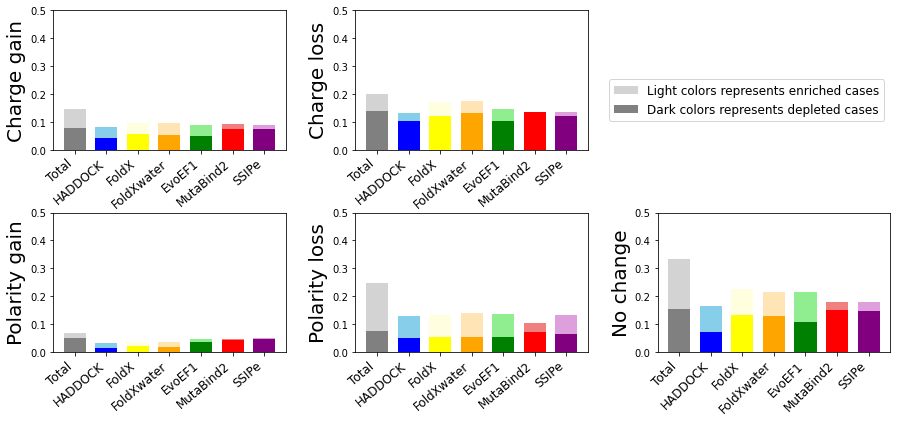

In [8]:
import matplotlib.pyplot as plt

colors_depleted = ['gray','blue', "yellow", "orange", "green", "red", "purple" ]
colors_enriched = ['lightgray','skyblue', "lightyellow" ,"moccasin", "lightgreen", "lightcoral", "plum" ]
labels = ['Total', 'HADDOCK', 'FoldX', 'FoldXwater','EvoEF1', 'MutaBind2', 'SSIPe']
width = 0.7



fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(334)
ax4 = fig.add_subplot(335)
ax5 = fig.add_subplot(336)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.45)

ax1.bar(labels, Dep_charge_gain_data["count"], width, label='Depleted', color=colors_depleted)
ax1.bar(labels, Enr_charge_gain_data["count"],width, label='Enriched', bottom=Dep_charge_gain_data["count"], color=colors_enriched)
ax1.set_ylim([0, 0.5])
ax1.set(ylabel="Charge gain")
ax1.yaxis.label.set_size(20)
ax1.set_xticklabels(labels, rotation=40, size=12, ha='right' )

ax2.bar(labels, Dep_charge_loss_data["count"], width, label='Depleted', color=colors_depleted)
ax2.bar(labels, Enr_charge_loss_data["count"],width, label='Enriched', bottom=Dep_charge_loss_data["count"], color=colors_enriched)
ax2.set_ylim([0, 0.5])
ax2.set(ylabel="Charge loss")
ax2.yaxis.label.set_size(20)
ax2.set_xticklabels(labels, rotation=40, size=12, ha='right' )

ax3.bar(labels, Dep_polarity_gain_data["count"], width, label='Depleted', color=colors_depleted)
ax3.bar(labels, Enr_polarity_gain_data["count"],width, label='Enriched', bottom=Dep_polarity_gain_data["count"], color=colors_enriched)
ax3.set_ylim([0, 0.5])
ax3.set(ylabel="Polarity gain")
ax3.yaxis.label.set_size(20)
ax3.set_xticklabels(labels, rotation=40, size=12, ha='right' )

ax4.bar(labels, Dep_polarity_loss_data["count"], width, label='Depleted', color=colors_depleted)
ax4.bar(labels, Enr_polarity_loss_data["count"],width, label='Enriched', bottom=Dep_polarity_loss_data["count"], color=colors_enriched)
ax4.set_ylim([0, 0.5])
ax4.set(ylabel="Polarity loss")
ax4.yaxis.label.set_size(20)
ax4.set_xticklabels(labels, rotation=40, size=12, ha='right' )

ax5.bar(labels, Enr_no_change_data["count"],width, label='Light colors represents enriched cases', bottom=Dep_no_change_data["count"], color=colors_enriched)
ax5.bar(labels, Dep_no_change_data["count"], width, label='Dark colors represents depleted cases', color=colors_depleted)
ax5.set_ylim([0, 0.5])
ax5.set(ylabel="No change")
ax5.yaxis.label.set_size(20)
ax5.set_xticklabels(labels, rotation=45, size=12, ha='right' )


plt.legend(loc='best', bbox_to_anchor=(1, 2), fontsize = 12)

plt.savefig('Physicochemical_class_change_figure.svg', bbox_inches='tight')


# Bias Analysis - Under the construction
Polarity gain / loss and Charge gain / loss

In [9]:
chage_gain = len(charge_gain_experimental)
charge_loss = len(charge_loss_experimental)
charge = chage_gain + charge_loss

polarity_gain = len(polarity_gain_experimental)
polarity_loss = len(polarity_loss_experimental)
polarity = polarity_gain + polarity_loss

#Charge
HADDOCK_enriched_charge_gain_ratio = round(len(Enr_charge_gain_HADDOCK) / charge, 2)
HADDOCK_enriched_charge_loss_ratio = round(len(Enr_charge_loss_HADDOCK) / charge, 2)
HADDOCK_depleted_charge_gain_ratio = round(len(Dep_charge_gain_HADDOCK) / charge, 2)
HADDOCK_depleted_charge_loss_ratio = round(len(Dep_charge_loss_HADDOCK) / charge, 2)

FoldX_enriched_charge_gain_ratio = round(len(Enr_charge_gain_FoldX) / charge, 2)
FoldX_enriched_charge_loss_ratio = round(len(Enr_charge_loss_FoldX) / charge, 2)
FoldX_depleted_charge_gain_ratio = round(len(Dep_charge_gain_FoldX) / charge, 2)
FoldX_depleted_charge_loss_ratio = round(len(Dep_charge_loss_FoldX) / charge, 2)

FoldXwater_enriched_charge_gain_ratio = round(len(Enr_charge_gain_FoldXwater) / charge, 2)
FoldXwater_enriched_charge_loss_ratio = round(len(Enr_charge_loss_FoldXwater) / charge, 2)
FoldXwater_depleted_charge_gain_ratio = round(len(Dep_charge_gain_FoldXwater) / charge, 2)
FoldXwater_depleted_charge_loss_ratio = round(len(Dep_charge_loss_FoldXwater) / charge, 2)

EvoEF1_enriched_charge_gain_ratio = round(len(Enr_charge_gain_EvoEF1) / charge, 2)
EvoEF1_enriched_charge_loss_ratio = round(len(Enr_charge_loss_EvoEF1) / charge, 2)
EvoEF1_depleted_charge_gain_ratio = round(len(Dep_charge_gain_EvoEF1) / charge, 2)
EvoEF1_depleted_charge_loss_ratio = round(len(Dep_charge_loss_EvoEF1) / charge, 2)

MutaBind2_enriched_charge_gain_ratio = round(len(Enr_charge_gain_MutaBind2) / charge, 2)
MutaBind2_enriched_charge_loss_ratio = round(len(Enr_charge_loss_MutaBind2) / charge, 2)
MutaBind2_depleted_charge_gain_ratio = round(len(Dep_charge_gain_MutaBind2) / charge, 2)
MutaBind2_depleted_charge_loss_ratio = round(len(Dep_charge_loss_MutaBind2) / charge, 2)

SSIPe_enriched_charge_gain_ratio = round(len(Enr_charge_gain_SSIPe) / charge, 2)
SSIPe_enriched_charge_loss_ratio = round(len(Enr_charge_loss_SSIPe) / charge, 2)
SSIPe_depleted_charge_gain_ratio = round(len(Dep_charge_gain_SSIPe) / charge, 2)
SSIPe_depleted_charge_loss_ratio = round(len(Dep_charge_loss_SSIPe) / charge, 2)

#Polarity
HADDOCK_enriched_polarity_gain_ratio = round(len(Enr_polarity_gain_HADDOCK) / polarity, 2)
HADDOCK_enriched_polarity_loss_ratio = round(len(Enr_polarity_loss_HADDOCK) / polarity, 2)
HADDOCK_depleted_polarity_gain_ratio = round(len(Dep_polarity_gain_HADDOCK) / polarity, 2)
HADDOCK_depleted_polarity_loss_ratio = round(len(Dep_polarity_loss_HADDOCK) / polarity, 2)

FoldX_enriched_polarity_gain_ratio = round(len(Enr_polarity_gain_FoldX) / polarity, 2)
FoldX_enriched_polarity_loss_ratio = round(len(Enr_polarity_loss_FoldX) / polarity, 2)
FoldX_depleted_polarity_gain_ratio = round(len(Dep_polarity_gain_FoldX) / polarity, 2)
FoldX_depleted_polarity_loss_ratio = round(len(Dep_polarity_loss_FoldX) / polarity, 2)

FoldXwater_enriched_polarity_gain_ratio = round(len(Enr_polarity_gain_FoldXwater) / polarity, 2)
FoldXwater_enriched_polarity_loss_ratio = round(len(Enr_polarity_loss_FoldXwater) / polarity, 2)
FoldXwater_depleted_polarity_gain_ratio = round(len(Dep_polarity_gain_FoldXwater) / polarity, 2)
FoldXwater_depleted_polarity_loss_ratio = round(len(Dep_polarity_loss_FoldXwater) / polarity, 2)

EvoEF1_enriched_polarity_gain_ratio = round(len(Enr_polarity_gain_EvoEF1) / polarity, 2)
EvoEF1_enriched_polarity_loss_ratio = round(len(Enr_polarity_loss_EvoEF1) / polarity, 2)
EvoEF1_depleted_polarity_gain_ratio = round(len(Dep_polarity_gain_EvoEF1) / polarity, 2)
EvoEF1_depleted_polarity_loss_ratio = round(len(Dep_polarity_loss_EvoEF1) / polarity, 2)

MutaBind2_enriched_polarity_gain_ratio = round(len(Enr_polarity_gain_MutaBind2) / polarity, 2)
MutaBind2_enriched_polarity_loss_ratio = round(len(Enr_polarity_loss_MutaBind2) / polarity, 2)
MutaBind2_depleted_polarity_gain_ratio = round(len(Dep_polarity_gain_MutaBind2) / polarity, 2)
MutaBind2_depleted_polarity_loss_ratio = round(len(Dep_polarity_loss_MutaBind2) / polarity, 2)

SSIPe_enriched_polarity_gain_ratio = round(len(Enr_polarity_gain_SSIPe) / polarity, 2)
SSIPe_enriched_polarity_loss_ratio = round(len(Enr_polarity_loss_SSIPe) / polarity, 2)
SSIPe_depleted_polarity_gain_ratio = round(len(Dep_polarity_gain_SSIPe) / polarity, 2)
SSIPe_depleted_polarity_loss_ratio = round(len(Dep_polarity_loss_SSIPe) / polarity, 2)

ratios = open("Physicochemical_class_change_ratios.txt","a") 
print('Charge', file=ratios)
print('HADDOCK_enriched_charge_gain_ratio is : ',HADDOCK_enriched_charge_gain_ratio, file=ratios)
print('HADDOCK_enriched_charge_loss_ratio is : ',HADDOCK_enriched_charge_loss_ratio, file=ratios)
print('HADDOCK_depleted_charge_gain_ratio is : ',HADDOCK_depleted_charge_gain_ratio, file=ratios)
print('HADDOCK_depleted_charge_loss_ratio is : ',HADDOCK_depleted_charge_loss_ratio, file=ratios)
print('FoldX_enriched_charge_gain_ratio is : ',FoldX_enriched_charge_gain_ratio, file=ratios)
print('FoldX_enriched_charge_loss_ratio is : ',FoldX_enriched_charge_loss_ratio, file=ratios)
print('FoldX_depleted_charge_gain_ratio is : ',FoldX_depleted_charge_gain_ratio, file=ratios)
print('FoldX_depleted_charge_loss_ratio is : ',FoldX_depleted_charge_loss_ratio, file=ratios)
print('FoldXwater_enriched_charge_gain_ratio is : ',FoldXwater_enriched_charge_gain_ratio, file=ratios)
print('FoldXwater_enriched_charge_loss_ratio is : ',FoldXwater_enriched_charge_loss_ratio, file=ratios)
print('FoldXwater_depleted_charge_gain_ratio is : ',FoldXwater_depleted_charge_gain_ratio, file=ratios)
print('FoldXwater_depleted_charge_loss_ratio is : ',FoldXwater_depleted_charge_loss_ratio, file=ratios)
print('EvoEF1_enriched_charge_gain_ratio is : ',EvoEF1_enriched_charge_gain_ratio, file=ratios)
print('EvoEF1_enriched_charge_loss_ratio is : ',EvoEF1_enriched_charge_loss_ratio, file=ratios)
print('EvoEF1_depleted_charge_gain_ratio is : ',EvoEF1_depleted_charge_gain_ratio, file=ratios)
print('EvoEF1_depleted_charge_loss_ratio is : ',EvoEF1_depleted_charge_loss_ratio, file=ratios)
print('MutaBind2_enriched_charge_gain_ratio is : ',MutaBind2_enriched_charge_gain_ratio, file=ratios)
print('MutaBind2_enriched_charge_loss_ratio is : ',MutaBind2_enriched_charge_loss_ratio, file=ratios)
print('MutaBind2_depleted_charge_gain_ratio is : ',MutaBind2_depleted_charge_gain_ratio, file=ratios)
print('MutaBind2_depleted_charge_loss_ratio is : ',MutaBind2_depleted_charge_loss_ratio, file=ratios)
print('SSIPe_enriched_charge_gain_ratio is : ',SSIPe_enriched_charge_gain_ratio, file=ratios)
print('SSIPe_enriched_charge_loss_ratio is : ',SSIPe_enriched_charge_loss_ratio, file=ratios)
print('SSIPe_depleted_charge_gain_ratio is : ',SSIPe_depleted_charge_gain_ratio, file=ratios)
print('SSIPe_depleted_charge_loss_ratio is : ',SSIPe_depleted_charge_loss_ratio, file=ratios)
print('Polarity', file=ratios)
print('HADDOCK_enriched_polarity_gain_ratio is : ',HADDOCK_enriched_polarity_gain_ratio, file=ratios)
print('HADDOCK_enriched_polarity_loss_ratio is : ',HADDOCK_enriched_polarity_loss_ratio, file=ratios)
print('HADDOCK_depleted_polarity_gain_ratio is : ',HADDOCK_depleted_polarity_gain_ratio, file=ratios)
print('HADDOCK_depleted_polarity_loss_ratio is : ',HADDOCK_depleted_polarity_loss_ratio, file=ratios)
print('FoldX_enriched_polarity_gain_ratio is : ',FoldX_enriched_polarity_gain_ratio, file=ratios)
print('FoldX_enriched_polarity_loss_ratio is : ',FoldX_enriched_polarity_loss_ratio, file=ratios)
print('FoldX_depleted_polarity_gain_ratio is : ',FoldX_depleted_polarity_gain_ratio, file=ratios)
print('FoldX_depleted_polarity_loss_ratio is : ',FoldX_depleted_polarity_loss_ratio, file=ratios)
print('FoldXwater_enriched_polarity_gain_ratio is : ',FoldXwater_enriched_polarity_gain_ratio, file=ratios)
print('FoldXwater_enriched_polarity_loss_ratio is : ',FoldXwater_enriched_polarity_loss_ratio, file=ratios)
print('FoldXwater_depleted_polarity_gain_ratio is : ',FoldXwater_depleted_polarity_gain_ratio, file=ratios)
print('FoldXwater_depleted_polarity_loss_ratio is : ',FoldXwater_depleted_polarity_loss_ratio, file=ratios)
print('EvoEF1_enriched_polarity_gain_ratio is : ',EvoEF1_enriched_polarity_gain_ratio, file=ratios)
print('EvoEF1_enriched_polarity_loss_ratio is : ',EvoEF1_enriched_polarity_loss_ratio, file=ratios)
print('EvoEF1_depleted_polarity_gain_ratio is : ',EvoEF1_depleted_polarity_gain_ratio, file=ratios)
print('EvoEF1_depleted_polarity_loss_ratio is : ',EvoEF1_depleted_polarity_loss_ratio, file=ratios)
print('MutaBind2_enriched_polarity_gain_ratio is : ',MutaBind2_enriched_polarity_gain_ratio, file=ratios)
print('MutaBind2_enriched_polarity_loss_ratio is : ',MutaBind2_enriched_polarity_loss_ratio, file=ratios)
print('MutaBind2_depleted_polarity_gain_ratio is : ',MutaBind2_depleted_polarity_gain_ratio, file=ratios)
print('MutaBind2_depleted_polarity_loss_ratio is : ',MutaBind2_depleted_polarity_loss_ratio, file=ratios)
print('SSIPe_enriched_polarity_gain_ratio is : ',SSIPe_enriched_polarity_gain_ratio, file=ratios)
print('SSIPe_enriched_polarity_loss_ratio is : ',SSIPe_enriched_polarity_loss_ratio, file=ratios)
print('SSIPe_depleted_polarity_gain_ratio is : ',SSIPe_depleted_polarity_gain_ratio, file=ratios)
print('SSIPe_depleted_polarity_loss_ratio is : ',SSIPe_depleted_polarity_loss_ratio, file=ratios)
ratios.close()